# Applying Data Science to DS Job Hunting

## Indeed API
Indeed.com offers a publisher's API for adding links in a web page or app. I decided to use this API
to gather a sample of job posting from which to scrape a list of skills.

The API will only return a maximum of 25 url's, so one needs a trick to get a significant amount of data. The trick I'm using now, is to query by zipcode. There are ~43K in the US so that's going to hopefully bring us some hits.
For now, I'm using 500 randomly selected samples of the ~43K zipcodes, returning from 0 to 25 urls from each.

## Parsing Out Skills
To parse out what I think are the skills, I use BeautifulSoup to iterate over the sections locating the bulleted points:
<span class='summary'>
<li> SQL
<li> Python
<li> AWS
</span>

Visual inspection indicates that most of the time, an employer will use a list to itemize the position skills.
It would be cool to run a second supporting project that tries to verify this. How many job posting contain any itemized lists versus those that do not ?
 
### Stop Words
I wanted a way to add new stop words. The word "data" obviously shows up many times and is not helpful.

## Begin Analysis
### Bar Plot 
To count up the parsed skill tokens, I employ SciKit-Learn's CountVectorizer and produce a simple bar plot output.

### Locations
For this example, I'm using all the zipcodes that start with '9' and 100 randomly selected samples. 

In [7]:
import indeed_scrape
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (15, 8)

%matplotlib inline
ind = indeed_scrape.Indeed()
ind.query = "data science"
ind.add_loc = '9' # will add regex-ed zip codes
ind.num_samp = 100
ind.stop_words = "data"

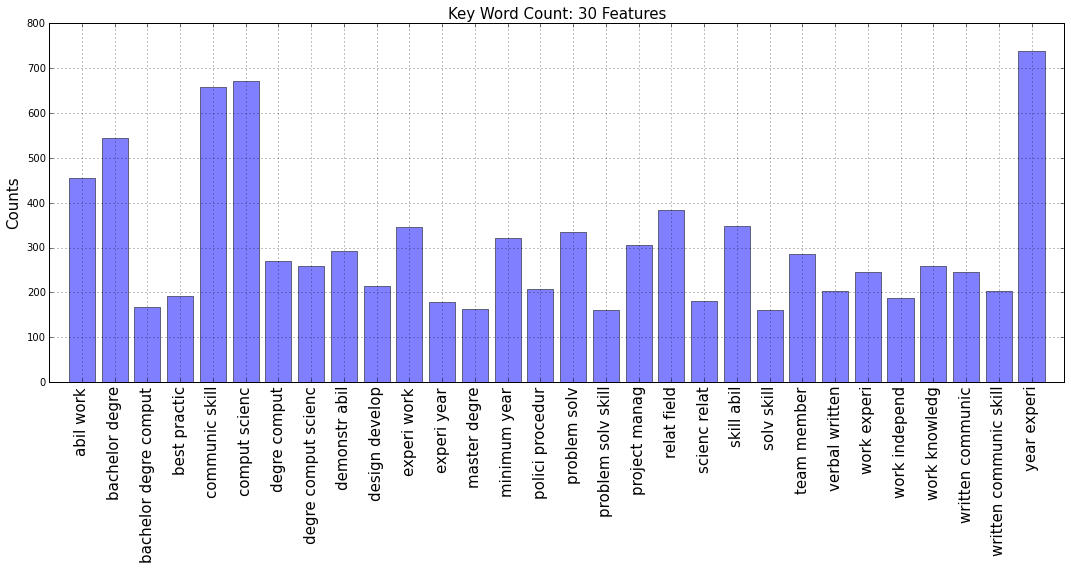

In [8]:
plt.figure(figsize=(15, 8))
ind.main()

indeed_scrape.Indeed() saves output to a file

In [9]:
import pandas as pd
df = pd.read_csv("data_frame.csv")
corpus = df['summary']

Take a look at how many job postings were returned.

In [10]:
df = df.drop_duplicates().dropna()
df['url'].count()

1451

## Monogram 
Above a Bi-gram analysis was performed by default. Let's include single words in the n-gram range,
(1,2), and using a corpus that has been stemmed with NLTK.

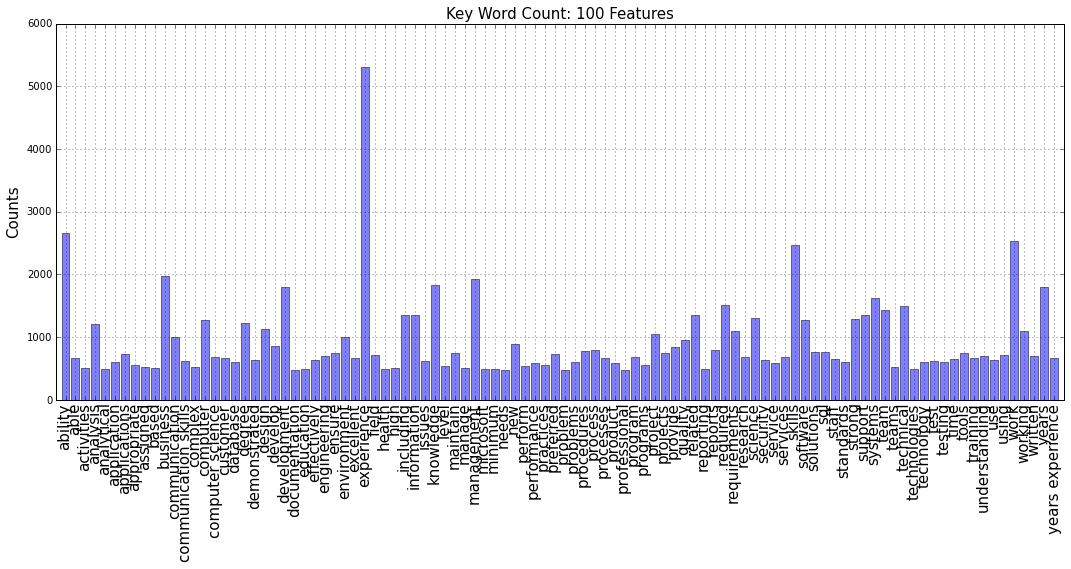

In [11]:
corpus_stem = df['summary_toke']
mat, fea = ind.vectorizer(corpus, n_min=1)
plt.figure(figsize=(15,8))
ind.plot_features(fea, mat)

## Explore High Count Words 
The word "experience" showed up with a high count. I want to know if there's more to that. Experience with a platform, technology, SQL or jusy previous analytic experiece. NLP is a deep rabbit hole, and I only peered a short ways down for this project. 

My word radius method gathers words to the left and right of a chosen keyword, and builds a corpus from within that radius. Then I apply the CountVectorizer again.

You'll notice that I need to write code to remove the keyword that was searched for, from the anlaysis.
Next iteration...

### Experience

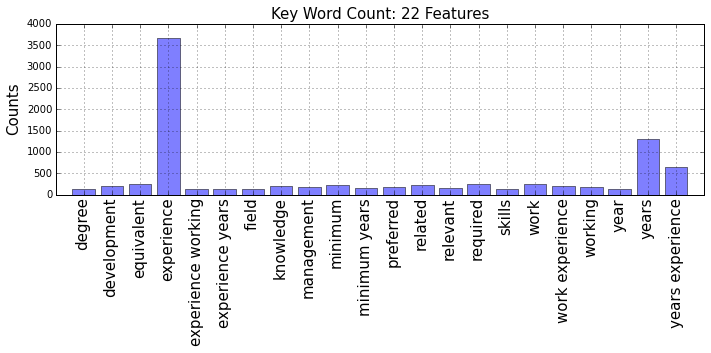

In [18]:
plt.figure(figsize=(10,5))
words_in_radius = ind.find_words_in_radius(corpus, 'experience', 5)
mat, fea = ind.vectorizer(words_in_radius, max_features=30, n_min=1)
ind.plot_features(fea, mat)

### Skills

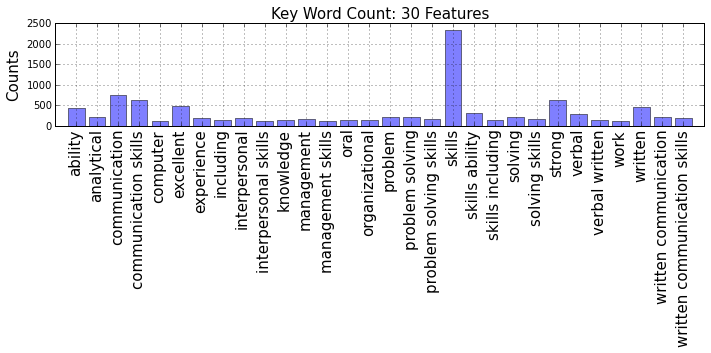

In [19]:
plt.figure(figsize=(10,5))
words_in_radius = ind.find_words_in_radius(corpus, 'skills', 5)
mat, fea = ind.vectorizer(words_in_radius, max_features=30, n_min=1)
ind.plot_features(fea, mat)

## Job Postings Per City

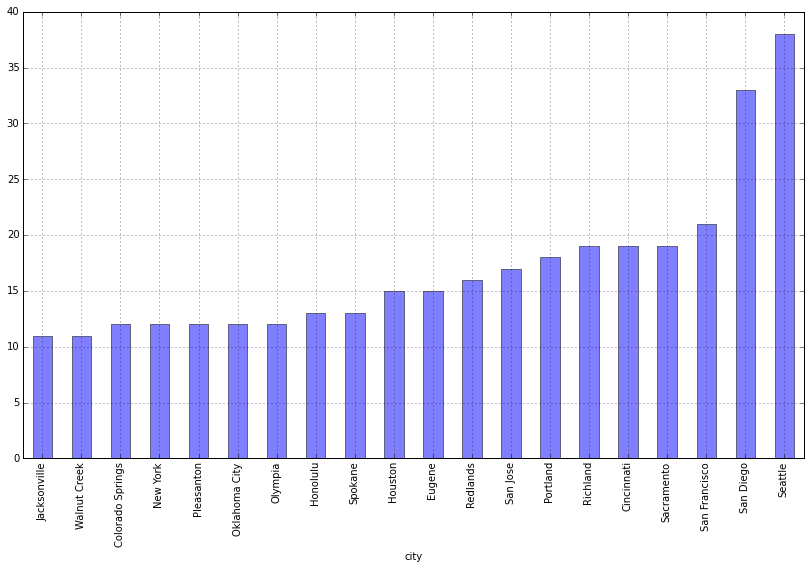

In [14]:
grp = df.groupby('city')
grp['url'].count().sort_values()[-20:].plot('bar', alpha=0.5, figsize=(14,8), grid=True)